In [1]:
import numpy as np
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [62]:
from string import punctuation
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

In [3]:
#news  dataframe loaded
news_df = pd.read_pickle("./final_total_news.pkl") #9881


In [18]:
news1_df=news_df[(news_df.content.map(len)>100) & (news_df.content.map(len)<= 1000)]
news1_df.reset_index(inplace=True,drop=True)

In [196]:
news1_df.source.value_counts()

MyInforms                        87
NewsR.in                         50
App.ViralNewsChart.com           49
NigerianHerald.com               38
Latest Nigerian News.com         34
NewsOnFeeds.com                  22
EIN News                         21
Individual.com                   20
Yahoo! News Australia            19
Hindustan Times                  19
DailyMe.Com                      19
UAE NewsApp.com                  18
Tech Investor News               17
DangoteNews.com                  16
Big News Network                 15
Fat Pitch Financials             15
HT Syndication                   14
Wall Street Business Network     14
Bayou Buzz                       13
Yahoo! Canada                    13
The Hindu                        13
NEWS.com.au                      13
Town Hall                        13
Topix                            13
Hubii                            13
Reuters                          12
TheTurkeyNews.Net                12
4 Traders                   

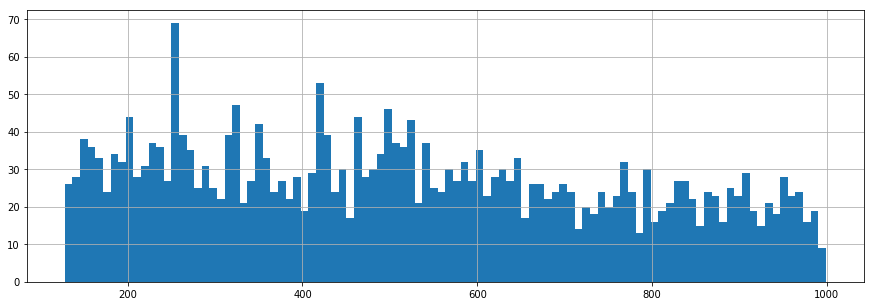

In [21]:
news1_df.content.map(len).hist(figsize=(15,5),bins=100)

In [101]:
news1_df.head(5)

content media-type  \
0  KUALA LUMPUR, Sept 15 (MySinchew) -- The Kuala...       News   
1  Mumbai, Sep 11 : Following were the indicative...       News   
2  Daily Mail  Sunday 27th September, 2015  \n 'W...       News   
3  Corbyn will not take part in weekly PM’s Quest...       News   
4  Arjen Robben reacts during the UEFA Euro 2016 ...       News   

            source                                              title  \
0       My Sinchew                  Pay up or face legal action: DBKL   
1    Newshence.com                   Euro up; USD, Pound and Yen down   
2  The Sydney News  Police chiefs warn ministers Were too broke to...   
3       Bayou Buzz  The Tom and Jerry Show: 'PM; Watson will run t...   
4             NDTV  Bayern Munich's Arjen Robben Sidelined With Gr...   

         Date      Time           Timestamp  
0  2015-09-15  10:17:53 2015-09-15 10:17:53  
1  2015-09-11  06:09:32 2015-09-11 06:09:32  
2  2015-09-27  16:23:51 2015-09-27 16:23:51  
3  2015-09-13  10:08:31 2015-09-13 10:08:31  
4  2015-09-06  16:05:22 2015-09-06 16:05:22

In [129]:
#Get news and blog content

def get_content(df):
    # content=[]
    for index,row in df.iterrows():
        content.append(row.content)
    return content
news=[]
blog=[]

contents=[news,blog]
dfs=[news1_df,blogs_df]
for df, content in zip(dfs,contents):
    content=get_content(df)
    print(len(content))
    
#print(len(blog_content),len(news_content)) #=>3580 9881

2780
3580


In [95]:
news[:5]

['KUALA LUMPUR, Sept 15 (MySinchew) -- The Kuala Lumpur City Hall today issued an ultimatum to Bersih 2.0 to pay the clean-up bill by this month or face legal action.\n\nDeputy federal territories minister Datuk Loga Bala Mohan Jaganathan said the bill amounting to RM61,840 includes the monitoring cost and cleaning of banners and graffiti as well as repair of damaged infrastructure.\n\nHe said DBKL would bring this matter to the court if Bersih 2.0 failed to pay up.',
 'Mumbai, Sep 11 : Following were the indicative currency notes\xa0 and travellers’ cheques buying and selling rates per unit\xa0 today.\xa0 CURRENCY NAME BUY SALE UAE DIRHAM 16.7276 19.1652 AUSTRALIAN DOLLAR 43.7311 49.3792\xa0 BANGLADESH TAKA 0.782276 0.921413\xa0 BAHRAIN DINAR 163.3139 186.6076 CANADIAN DOLLAR 46.2854 53.1733\xa0 SWISS FRANC 63.3832 72.8305 CHINESE YUAN 7.36 11.96 DANISH KRONE 9.1253 10.6636     EURO 69.8139 79.004\xa0 STERLING POUND 95.581 108.1744 HONG KONG DOLLAR 7.7277 9.2278\xa0 JAPANESE YEN 0.509

In [26]:
#Prepare the stop_words_list
from sklearn.feature_extraction import stop_words
stop_list = list(stop_words.ENGLISH_STOP_WORDS)
stop_list.extend(['like','looking','september','monday','t','will','tuesday','wednesday','thursday','friday','saturday','sunday','including','old','vs','ie','industry','statements','net','entirely','track','according','mr','department','new','time','src', 'module','include','miles','series','read','just','know','people','know','way','really','make','want','ve','things','think','need','going','little','ll','look','got','thing','feel','does','year','day','said','new','just','years','big','st','news','did','told','reached','shall','window','tab','caption','id','align','com','http','www','https','said','based','percent','used','use','et al','pp','et al','ss','exp','ft','pf','src','prnewswire','newswire','visit','view','source','click'])

In [27]:
len(stop_list)

411

In [ ]:
# remove non ascii characters and standardize the text (can't -> cannot, i'm -> i am). 
# This will make the tokenization process more efficient.

In [132]:
#tokenize

ntokens=[]
tokens=[]
for content in news:
    tkns=word_tokenize(content) 
    new = [word.lower() for word in tkns if word.isalpha()]
    clean = [clean_text(word) for word in new if word not in stop_list] 
    ntokens.append(clean)
    tokens.extend(clean)

In [133]:
print(len(tokens),len(ntokens))

112346 2780


In [134]:
print(ntokens[1])

['mumbai', 'sep', 'following', 'indicative', 'currency', 'notes', 'cheques', 'buying', 'selling', 'rates', 'unit', 'today', 'currency', 'buy', 'sale', 'uae', 'dirham', 'australian', 'dollar', 'bangladesh', 'taka', 'bahrain', 'dinar', 'canadian', 'dollar', 'swiss', 'franc', 'chinese', 'yuan', 'danish', 'krone', 'euro', 'sterling', 'pound', 'hong', 'kong', 'dollar', 'japanese', 'yen', 'kuwaiti', 'dinar', 'sri', 'lanka', 'rupee', 'malaysian', 'ringitt', 'norwegian', 'krone', 'nepalese', 'rupee', 'zealand', 'dollar', 'omani', 'rial', 'pakistan', 'rupee', 'qatari', 'rial', 'saudi', 'rial', 'swedish', 'krona', 'singapore', 'dollar', 'thai', 'baht', 'dollar', 'south', 'african', 'rand']


In [135]:
token_series=pd.Series(ntokens)

In [136]:
news1_df.drop(columns='tokens',inplace=True)

/Users/codess/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [137]:
news1_df.head(1)

content media-type      source  \
0  KUALA LUMPUR, Sept 15 (MySinchew) -- The Kuala...       News  My Sinchew   

                               title        Date      Time           Timestamp  
0  Pay up or face legal action: DBKL  2015-09-15  10:17:53 2015-09-15 10:17:53

In [138]:
news1_df.insert(loc=0, column='tokens', value=token_series)

In [139]:
news1_df.head(1)

tokens  \
0  [kuala, lumpur, sept, mysinchew, kuala, lumpur...   

                                             content media-type      source  \
0  KUALA LUMPUR, Sept 15 (MySinchew) -- The Kuala...       News  My Sinchew   

                               title        Date      Time           Timestamp  
0  Pay up or face legal action: DBKL  2015-09-15  10:17:53 2015-09-15 10:17:53

In [140]:
news1_df['tokens'][1]

['mumbai',
 'sep',
 'following',
 'indicative',
 'currency',
 'notes',
 'cheques',
 'buying',
 'selling',
 'rates',
 'unit',
 'today',
 'currency',
 'buy',
 'sale',
 'uae',
 'dirham',
 'australian',
 'dollar',
 'bangladesh',
 'taka',
 'bahrain',
 'dinar',
 'canadian',
 'dollar',
 'swiss',
 'franc',
 'chinese',
 'yuan',
 'danish',
 'krone',
 'euro',
 'sterling',
 'pound',
 'hong',
 'kong',
 'dollar',
 'japanese',
 'yen',
 'kuwaiti',
 'dinar',
 'sri',
 'lanka',
 'rupee',
 'malaysian',
 'ringitt',
 'norwegian',
 'krone',
 'nepalese',
 'rupee',
 'zealand',
 'dollar',
 'omani',
 'rial',
 'pakistan',
 'rupee',
 'qatari',
 'rial',
 'saudi',
 'rial',
 'swedish',
 'krona',
 'singapore',
 'dollar',
 'thai',
 'baht',
 'dollar',
 'south',
 'african',
 'rand']

In [141]:
def keywords(source):
    tokens = news1_df[news1_df['source'] == source]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

In [142]:
for source in set(news1_df['source']):
    print('source :', source)
    print('top 10 keywords:', keywords(source))
    print('---')

source : Pittsburgh Business Times
top 10 keywords: [('contract', 3), ('pittsburgh', 2), ('transplant', 2), ('patients', 2), ('mold', 2), ('university', 2), ('adjunct', 2), ('instructors', 2), ('usw', 2), ('ratified', 2)]
---
source : Orlando Business Journal
top 10 keywords: [('apartment', 2), ('near', 2), ('orlando', 2), ('communities', 1), ('central', 1), ('florida', 1), ('attracted', 1), ('buyers', 1), ('weeks', 1), ('deal', 1)]
---
source : India Everyday
top 10 keywords: [('home', 9), ('india', 6), ('article', 4), ('tags', 4), ('geelani', 3), ('rediff', 2), ('dhoni', 2), ('hindu', 2), ('government', 2), ('suspended', 2)]
---
source : Britten's Info
top 10 keywords: [('trial', 5), ('email', 3), ('subscriber', 2), ('site', 2), ('set', 2), ('password', 2), ('sorry', 1), ('permission', 1), ('content', 1), ('login', 1)]
---
source : Recruiter Magazine
top 10 keywords: [('recruitment', 9), ('consultant', 6), ('senior', 3), ('email', 2), ('comment', 2), ('healthcare', 2), ('mirza', 2), 

In [143]:
counter = Counter(tokens)
counter.most_common(10)

[('police', 457),
 ('company', 255),
 ('service', 253),
 ('state', 247),
 ('says', 235),
 ('city', 225),
 ('home', 223),
 ('information', 220),
 ('article', 219),
 ('world', 212)]

In [ ]:

* Vectorize
* Dimensionally reduce (LSA/NMF/LDA)
* Do similarity check on topic vectors (not word vectors)
* Cluster / make dendogram

In [144]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
#                                    stop_words=stop_list, 
#                                    token_pattern="\\b[a-z][a-z]+\\b",
#                                    lowercase=True,
#                                    min_df=,
#                                    max_df = 0.8)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words=stop_list, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df=10,
                                   max_df = 0.8)

In [145]:
#### Vectorize NEWS
#cv_news = count_vectorizer.fit_transform(news_l)
tfidf_news = tfidf_vectorizer.fit_transform(tokens)
#terms is just a list of the features used in the tf-idf matrix
terms_news = tfidf_vectorizer.get_feature_names()

In [146]:
#print("CV-news:", cv_news.shape)
print("TFIDF-news:", tfidf_news.shape)
print("TFIDF-news-terms(first 15):", terms_news[16:26])

TFIDF-news: (112346, 2451)
TFIDF-news-terms(first 15): ['achieve', 'acquired', 'acquisition', 'act', 'acting', 'action', 'actions', 'active', 'activities', 'activity']


In [147]:

from sklearn.decomposition import  TruncatedSVD

n_comp = 50

lsa_tfidf = TruncatedSVD(n_components=n_comp)
#lsa_cv = TruncatedSVD(n_components=n_comp)
#nmf_cv = NMF(n_components=n_comp)

#### DIMENSIONALITY REDUCTION FOR NEWS

lsa_tfidf_news = lsa_tfidf.fit_transform(tfidf_news)
#lsa_cv_news = lsa_cv.fit_transform(cv_news)
#nmf_cv_news = nmf_cv.fit_transform(cv_news)
#terms is just a list of the features used in the tf-idf matrix
#terms_news = tfidf_vectorizer.get_feature_names()


In [148]:
lsa_tfidf_news.shape

(112346, 50)

In [158]:
#### Vectorize NEWS
vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words=stop_list, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df=10,
                                   max_df = 0.8)
#cv_news = count_vectorizer.fit_transform(news_l)
tfidf_news_tokens = vectorizer.fit_transform(list(news1_df['tokens'].map(lambda tokens: ' '.join(tokens))))
#terms is just a list of the features used in the tf-idf matrix
terms_news_tokens = vectorizer.get_feature_names()

In [159]:
tfidf_news_tokens.shape

(2780, 2367)

In [161]:
type(vectorizer.idf_)

numpy.ndarray

In [162]:
tfidf = dict(zip(terms_news_tokens, vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

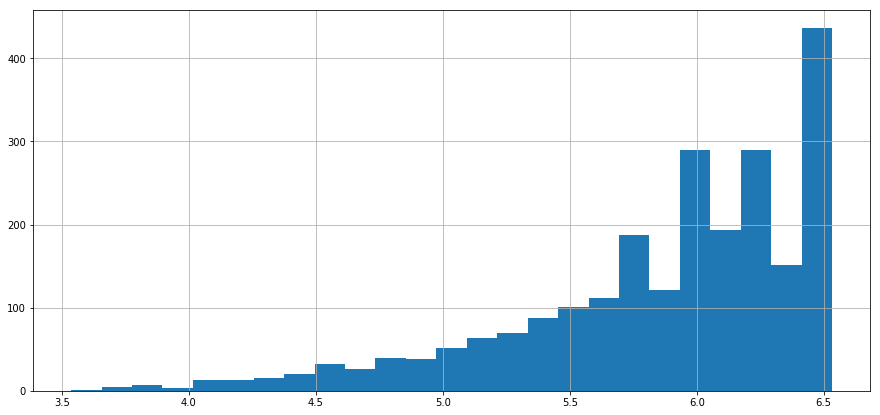

In [163]:
#distribution of tf-idf scores
tfidf.tfidf.hist(bins=25, figsize=(15,7))

In [165]:
#Let's display the 30 tokens that have the lowest tfidf scores
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


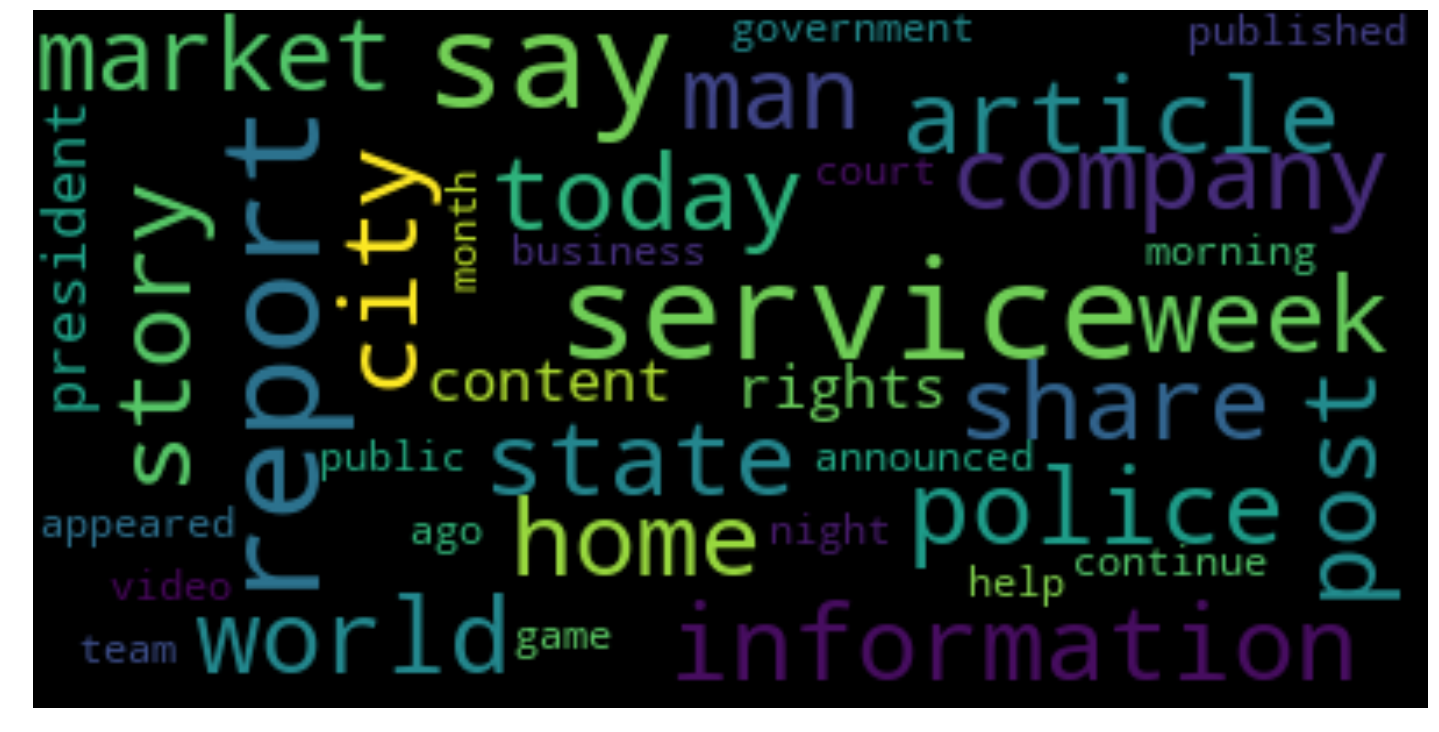

In [166]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))

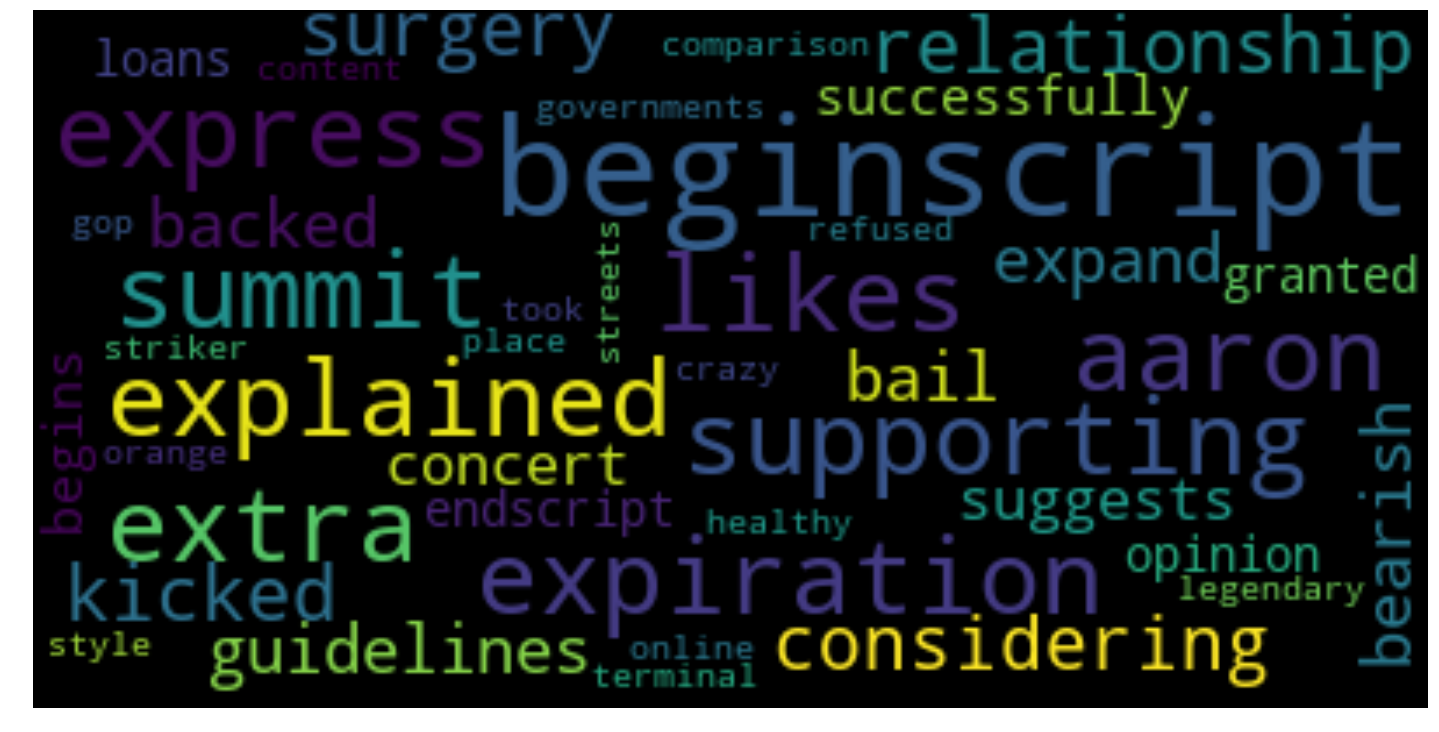

In [167]:
#words with the highest tfidf scores.
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(40))

In [168]:
#dimensionality reduction
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(tfidf_news_tokens)

svd_tfidf.shape

(2780, 50)

In [173]:
#reducing dimension to 2

# run this (takes times)
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)
print(tsne_tfidf.shape)
tsne_tfidf_df = pd.DataFrame(tsne_tfidf)
tsne_tfidf_df.columns = ['x', 'y']
tsne_tfidf_df['source'] = news1_df['source']
tsne_tfidf_df['title'] = news1_df['title']
tsne_tfidf_df.to_csv('./tsne_tfidf.csv', encoding='utf-8', index=False)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2780 samples in 0.005s...
[t-SNE] Computed neighbors for 2780 samples in 0.703s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2780
[t-SNE] Computed conditional probabilities for sample 2000 / 2780
[t-SNE] Computed conditional probabilities for sample 2780 / 2780
[t-SNE] Mean sigma: 0.091817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.566017
[t-SNE] Error after 500 iterations: 1.563016
(2780, 2)


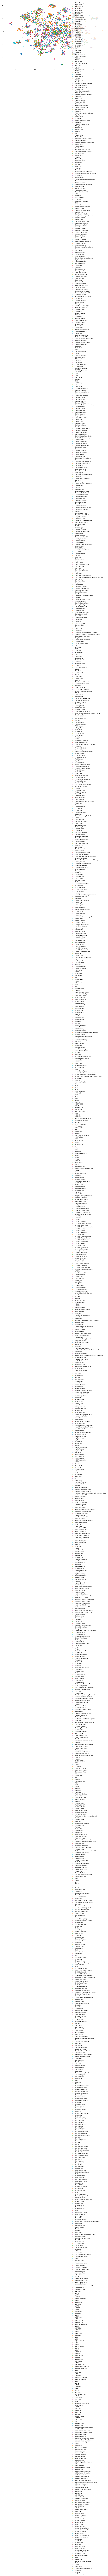

In [175]:
groups = tsne_tfidf_df.groupby('source')
fig, ax = plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
ax.legend()
plt.show()
savefig('test.png', bbox_inches='tight')

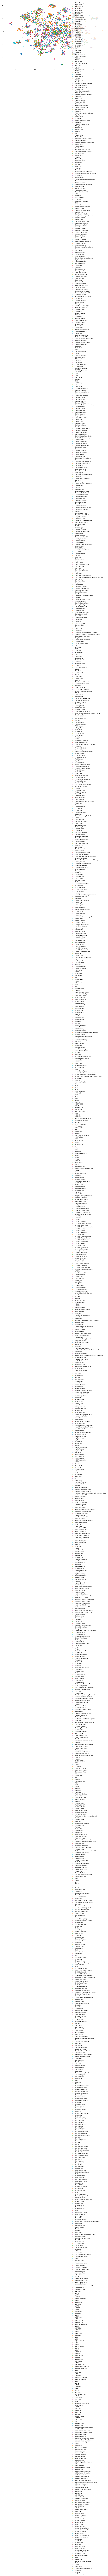

NameError: name 'savefig' is not defined

In [200]:
groups = tsne_tfidf_df.groupby('source')
fig, ax = plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
ax.legend()
plt.show()
savefig('test.png', bbox_inches='tight')

In [180]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tqdm import tqdm, tqdm_notebook

In [181]:
distorsions = []
sil_scores = []
k_max = 80
for k in tqdm_notebook(range(2, k_max)):
    kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, random_state=42,  
                         init_size=1000, verbose=False, max_iter=1000)
    kmeans_model.fit(tfidf_news_tokens)
    sil_score = silhouette_score(tfidf_news_tokens, kmeans_model.labels_)
    sil_scores.append(sil_score)
    distorsions.append(kmeans_model.inertia_)

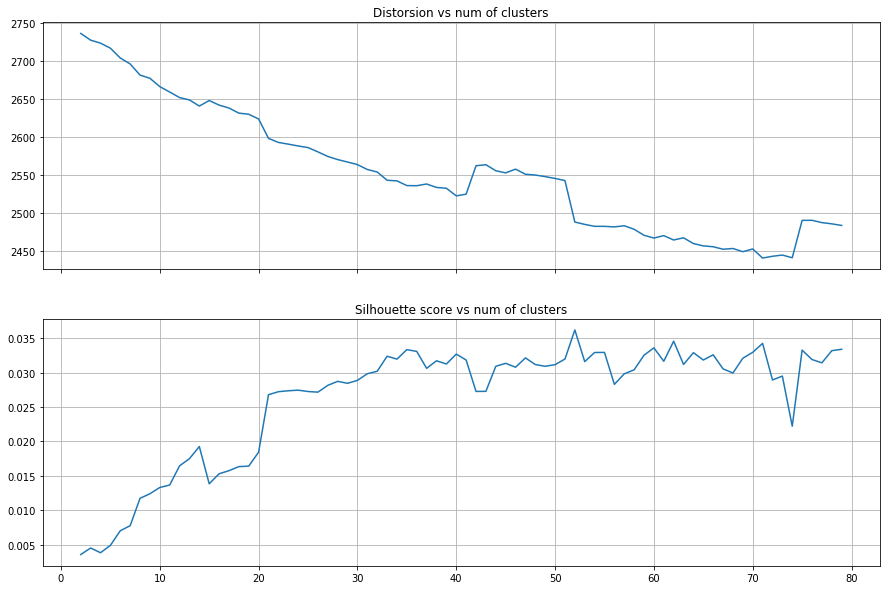

In [182]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

ax1.plot(range(2, k_max), distorsions)
ax1.set_title('Distorsion vs num of clusters')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)

In [183]:
num_clusters = 40
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42,                       
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000, )
kmeans = kmeans_model.fit(tfidf_news_tokens)
kmeans_clusters = kmeans.predict(tfidf_news_tokens)
kmeans_distances = kmeans.transform(tfidf_news_tokens)

In [193]:
svd_kmeans = kmeans_model.fit(svd_tfidf)
svd_kmeans_clusters = kmeans.predict(svd_tfidf)
svd_kmeans_distances = kmeans.transform(svd_tfidf)

In [190]:
#hot keywords for each topic
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = terms_news_tokens
all_keywords = []
for i in range(num_clusters):
    topic_keywords = []
    for j in sorted_centroids[i, :10]:
        topic_keywords.append(terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['cluster_{0}'.format(i) for i in range(num_clusters)], 
                           columns=['keyword_{0}'.format(i) for i in range(10)],
                           data=all_keywords)
keywords_df

keyword_0         keyword_1  \
cluster_0          project              fear   
cluster_1             pope           francis   
cluster_2           access          password   
cluster_3           season              game   
cluster_4          funeral            family   
cluster_5           police               man   
cluster_6            south            africa   
cluster_7            women           special   
cluster_8           school          students   
cluster_9            sales            growth   
cluster_10         million           federal   
cluster_11  online service            online   
cluster_12        minister             prime   
cluster_13        embedded  embedded content   
cluster_14   environmental            social   
cluster_15             tax               ani   
cluster_16     minutes ago               ago   
cluster_17             edt           options   
cluster_18          shares           company   
cluster_19           stock            quotes   
cluster_20          approx               utc   
cluster_21       president             state   
cluster_22            bank            points   
cluster_23      university          football   
cluster_24            city               pay   
cluster_25            road               car   
cluster_26           email            search   
cluster_27             oil            report   
cluster_28              pr   rights reserved   
cluster_29        transfer            energy   
cluster_30   post appeared            united   
cluster_31           video           browser   
cluster_32       subscribe      subscription   
cluster_33        comments            artist   
cluster_34        continue             event   
cluster_35           debit             stock   
cluster_36          market              food   
cluster_37          herald    morning herald   
cluster_38             nfl             guard   
cluster_39           court               man   

                                   keyword_2                  keyword_3  \
cluster_0                             health                  religious   
cluster_1                       pope francis                     united   
cluster_2                              month                      login   
cluster_3                               team                        win   
cluster_4                            newline                    service   
cluster_5                              woman                    suspect   
cluster_6                            african               south africa   
cluster_7                               open                      round   
cluster_8                          education                    release   
cluster_9                             august                       past   
cluster_10                            claims                       sold   
cluster_11                           service           article entirety   
cluster_12                    prime minister                 government   
cluster_13                           content                      video   
cluster_14  information collaboration future  information collaboration   
cluster_15                            square                     street   
cluster_16                           minutes                        web   
cluster_17                              nyse                      stock   
cluster_18                           trading                        plc   
cluster_19                      stock market                   provided   
cluster_20                              post                      hours   
cluster_21                              says                 government   
cluster_22                             index                    central   
cluster_23                              game                  francisco   
cluster_24                             court                      mayor   
cluster_25                            county                    sheriff   
cluster_26             

In [90]:
news_df.head(2)

content media-type  \
1  VETERANS saluted Worcester's first ever breakf...       News   
2  New Product Gives Marketers Access to Real Key...       News   

                             source  \
1               Redditch Advertiser   
2  Virtualization Conference & Expo   

                                               title        Date      Time  \
1  Worcester breakfast club for veterans gives hu...  2015-09-07  10:16:14   
2  Jumpshot Gives Marketers Renewed Visibility In...  2015-09-17  15:00:00   

            Timestamp  cluster  
1 2015-09-07 10:16:14        2  
2 2015-09-17 15:00:00        1

In [85]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_news)